# Iris clustering using KNN
This example applies KNN clustering in order to predict the type of iris plant based on sepal and petal length and width.
## Import general libs

In [1]:
import numpy as np    
import pandas as pd

## Load the Dataset
1. Database is available at [UCI Iris Plants Database](http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data).
2. But it can be loaded using sklearn datasets, as follows.

Any doubts, please verify the [data set information](http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names), as:

**Attribute Information:**
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      - Iris Setosa
      - Iris Versicolour
      - Iris Virginica

In [2]:
from sklearn import datasets
features = ['sepal_length', 'sepal width', 'petal_length', 'petal_width' ]
classes = ['Iris Setosa','Iris Versicolour','Iris Virginica']

iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target

print (X[:5,:])
print (y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


### Optional: Plot the dataset

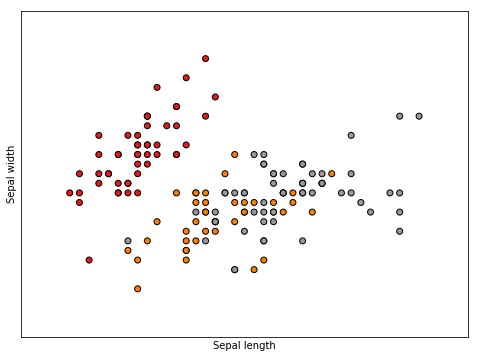

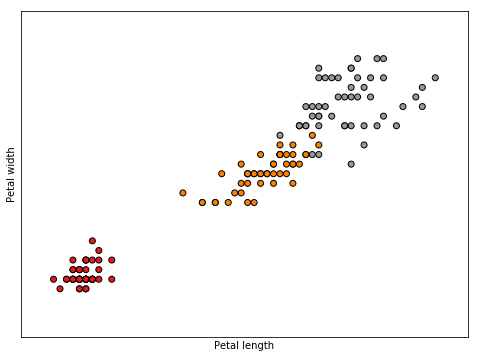

In [8]:
import matplotlib.pyplot as plt

plt.figure(1, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.figure(2, figsize=(8, 6))
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

x_min, x_max = X[:, 2].min() - .5, X[:, 2].max() + .5
y_min, y_max = X[:, 3].min() - .5, X[:, 3].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

## Split the Dataset
Split the dataset into 80% trainning and 20% test examples

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Pre-process the dataset
Apply StandardScaler in order to have "standardized features by removing the mean and scaling to unit variance"

In [5]:
from sklearn.preprocessing import StandardScaler  

print 'X before StandardScaler.transform'
print X_train[:5,:]

scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

print '\nX after StandardScaler.transform'
print X_train[:5,:]

X before StandardScaler.transform
[[5.5 2.3 4.  1.3]
 [6.7 3.  5.2 2.3]
 [6.3 2.5 4.9 1.5]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

X after StandardScaler.transform
[[-0.41163833 -1.70259652  0.15832607  0.17603049]
 [ 1.04477248 -0.12924     0.83686636  1.49625917]
 [ 0.55930221 -1.25306608  0.66723129  0.44007623]
 [-1.13984374 -0.12924    -1.31184457 -1.27622106]
 [-1.38257888  0.32029043 -1.3683896  -1.27622106]]


## Create the KNN Classifier
And predict the class of test base

In [6]:
from sklearn.neighbors import KNeighborsClassifier  

classifier = KNeighborsClassifier(n_neighbors=15)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)

## Evaluate the results
Plot the confusion matrix and the classification report (precision, recall, f1-score and the support)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 9  0  0]
 [ 0  9  2]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.82      0.90        11
           2       0.83      1.00      0.91        10

   micro avg       0.93      0.93      0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



## Acknowledgements
1. [UCI Iris Data Set](http://archive.ics.uci.edu/ml/datasets/Iris)
2. scikit-learn - [The Iris Data Set](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
2. [K-Nearest Neighbors Algorithm in Python and Scikit-Learn](https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/) By Scott Robinson